On commence par importer les librairies que l'on utilisera, et à régler certains paramètres de résolution des figures.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 240
plt.rcParams['savefig.dpi'] = 240

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

# Exercice 1

On commence par écrire une fonction qui prend en entrée une fonction $f$, des bornes $x^{min}$ et $x^{max}$ et un nombre de pas $N$ et qui affiche le graphe formé par les $(x_i,f(x_i))_{i=0,1,..,N}$ où les $x_i$ sont des points qui échantillonnent l'intervalle $[x^{min},x^{max}]$ à intervalles réguliers. 

In [3]:
def ex1_affichage(f,xmin,xmax,N):
    X=np.linspace(xmin,xmax,N)#On créé la subdivision de l'intervalle
    plt.plot(X,f(X))
    plt.plot(X,np.zeros(N))#On affiche aussi la droite y=0, pour pouvoir 
                            #observer le tableau de signe
    plt.xlabel('x')
    plt.ylabel('f(x)')

On définit les différentes fonctions de l'exercice

In [4]:
def ex1_f1(x):
    return (1-x**2)*x
def ex1_f2(x):
    return -np.sin(x)
def ex1_f3(x):
    return 1-np.sin(x)
def ex1_f4(x):
    return 2-np.sin(x)

1) Lorsqu'on résout $\dot{x}=f(x)$ avec $x(0)=x_0$, la fonction $x$ est toujours monotone et son sens de variation est donnée par le signe de $f$. On observe ici que
- Si $x_0<-1$, alors $x(t)$ augmente et tend vers $-1$.
- Si $-1<x_0<0$, alors $x(t)$ diminue et tend vers $-1$.
- Si $0<x_0<1$, alors $x(t)$ augmente et tend vers $1$.
- Si $1<x_0$, alors $x(t)$ diminue et tend vers $1$.
- Si $x_0=-1,0,$ ou $1$, alors $x(t)$ reste constante.

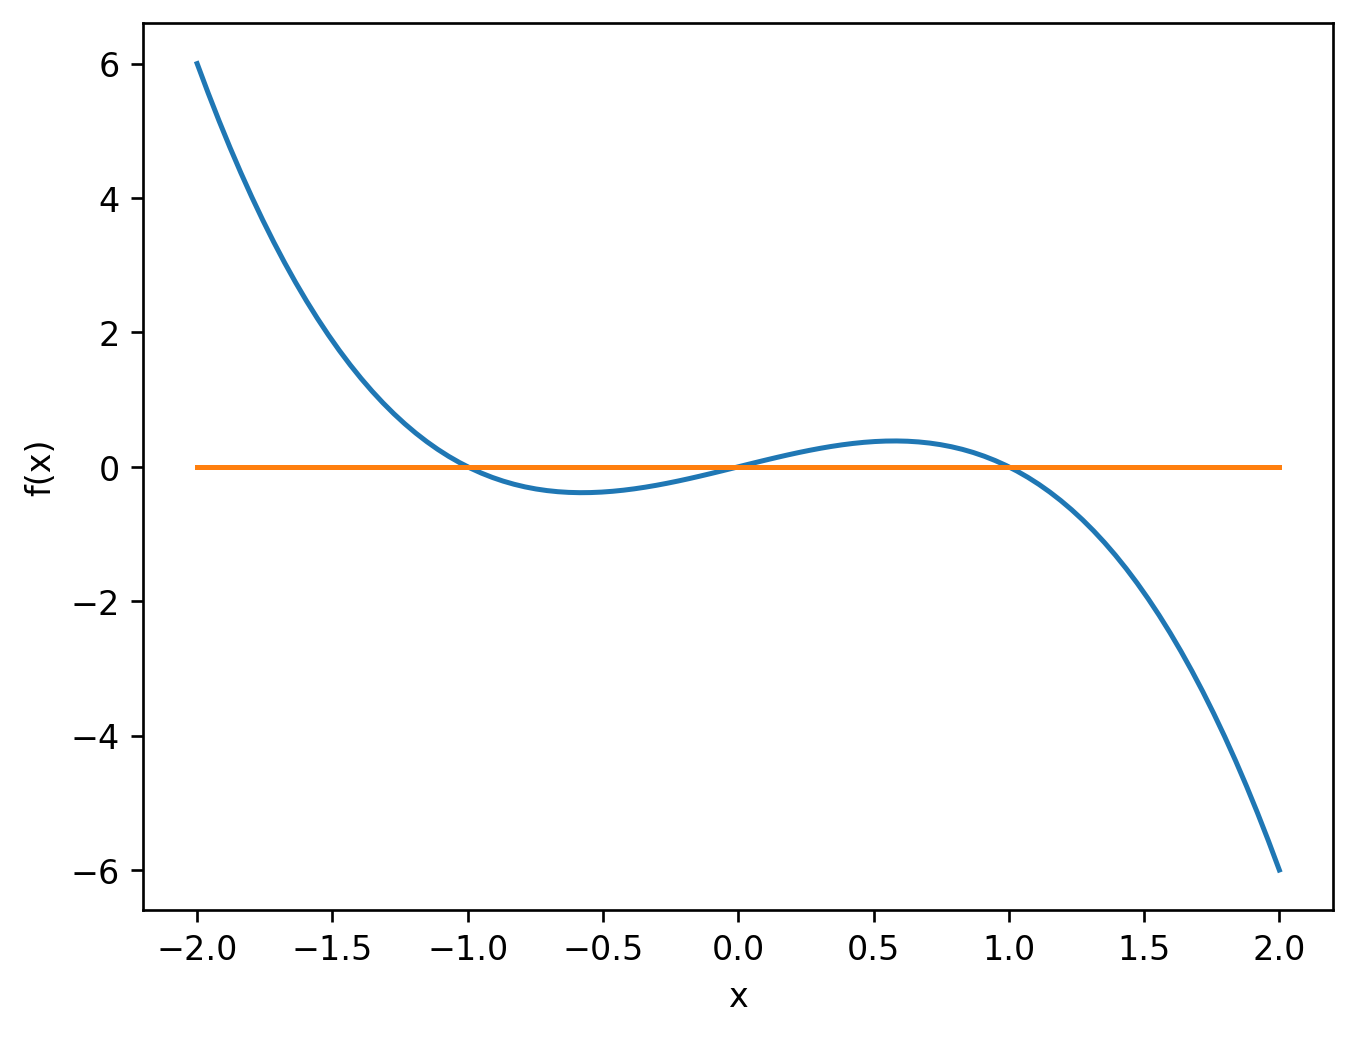

In [5]:
ex1_affichage(ex1_f1,-2,2,100)

3) Cette fois, la fonction s'annule exactement lorsque $\sin(x)=1$, c'est-à-dire lorsque $x=-3\pi/2, \pi/2,5\pi/2,..$, et plus généralement en $x=2\pi k+\frac{\pi}{2}$ pour un entier relatif $k\in\mathbb{Z}$. Il y a seulement deux comportement possible:
- $x_0=2\pi k+\frac{\pi}{2}$ et $x(t)$ reste constante.
- $2\pi (k-1)+\frac{\pi}{2}<x_0<2\pi k+\frac{\pi}{2}$ et $x(t)$ augmente et tend vers $2\pi k+\frac{\pi}{2}$.

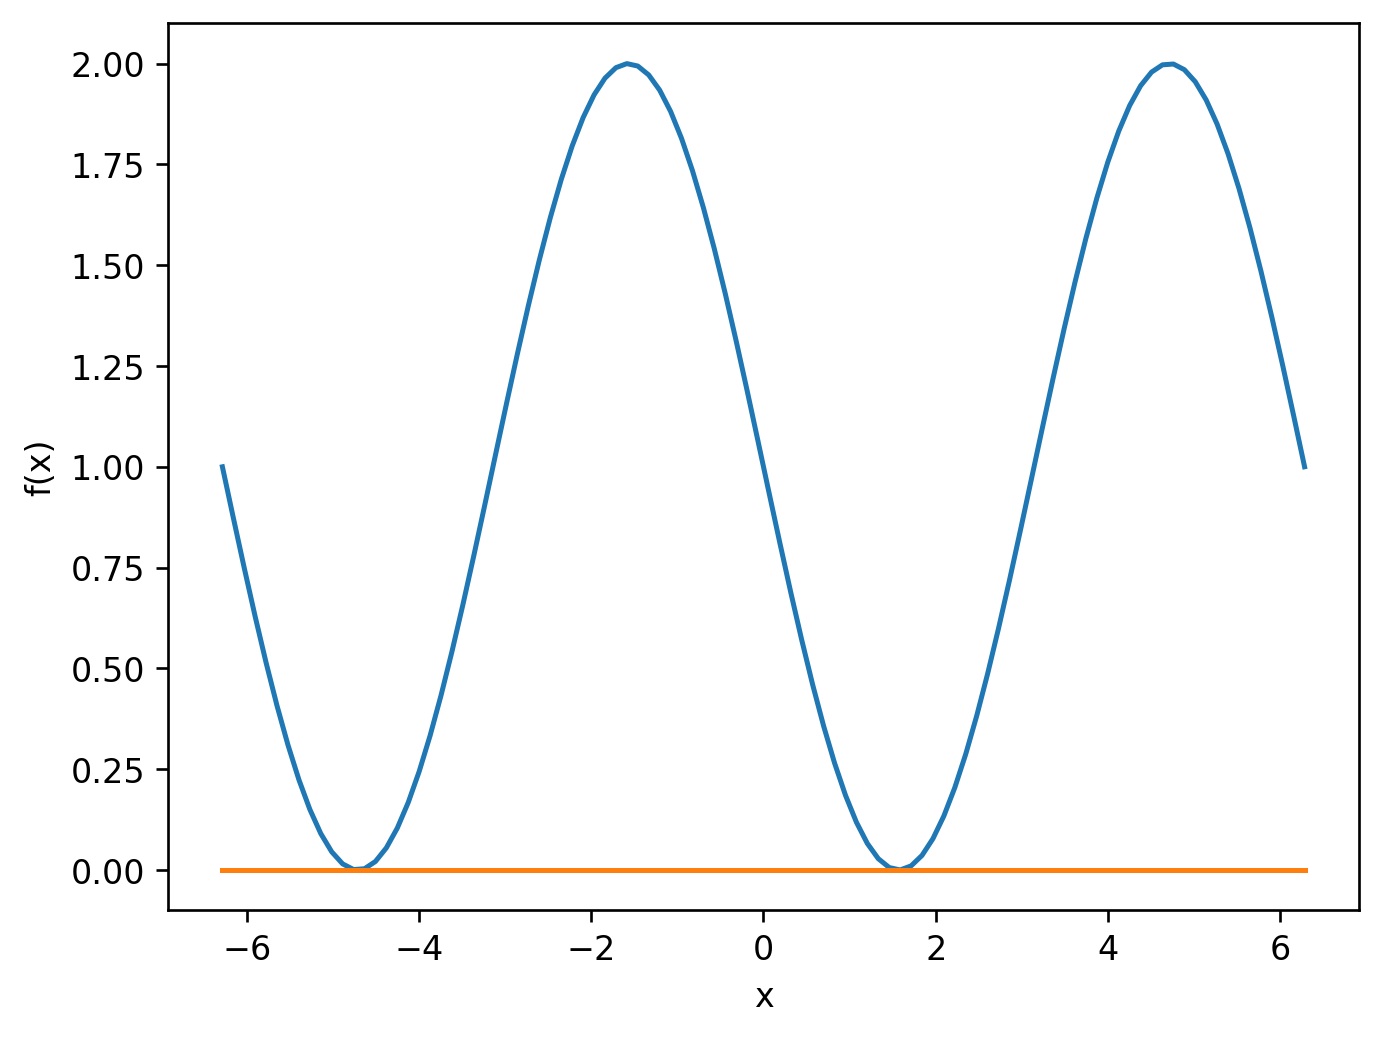

In [6]:
ex1_affichage(ex1_f3,-2*np.pi,2*np.pi,100)

4) Cette fois, il n'y a plus de lieux d'annulation et la fonction $f$ est positive: pour n'importe quelle condition initiale $x_0$, la fonction $t\mapsto x(t)$ augmente et tend vers $+\infty$.

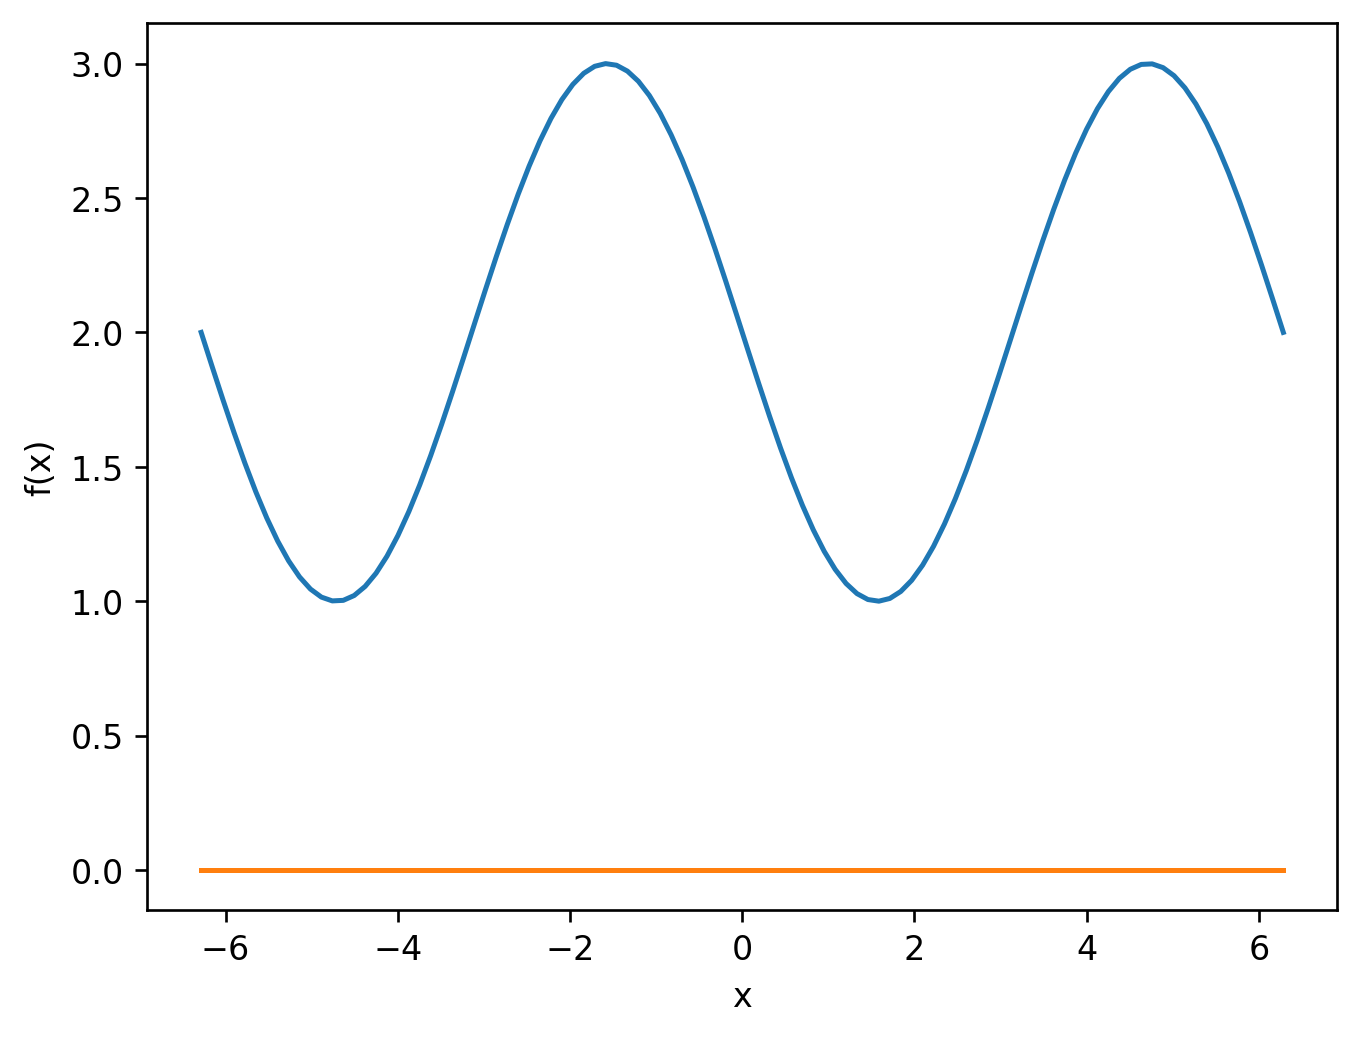

In [7]:
ex1_affichage(ex1_f4,-2*np.pi,2*np.pi,100)

# Exercice 2

1)

In [8]:
def ex2_eulerexp(x0,Tf,N):
    T=np.linspace(0,Tf,N+1)
    dt=Tf/N
    X=np.zeros(N+1)
    X[0]=x0
    for i in range(N):
        X[i+1]=X[i]+dt*(-X[i]+np.sin(T[i]))
    return T,X

2)

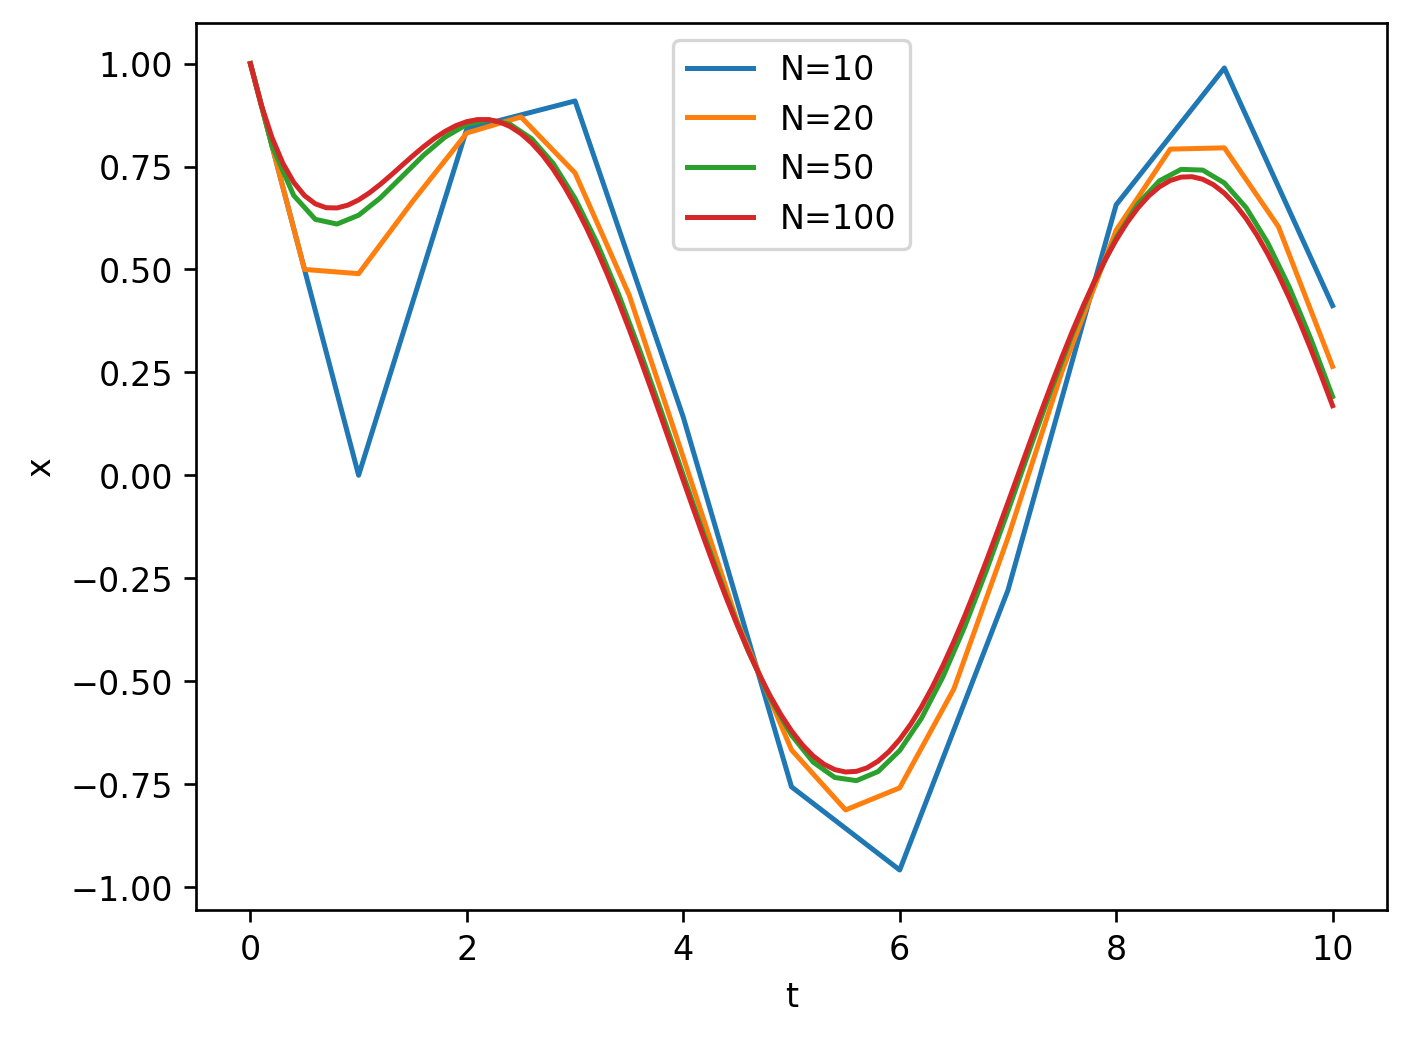

In [9]:
T1,X1=ex2_eulerexp(1,10,10)
T2,X2=ex2_eulerexp(1,10,20)
T3,X3=ex2_eulerexp(1,10,50)
T4,X4=ex2_eulerexp(1,10,100)
plt.plot(T1,X1,label='N=10')
plt.plot(T2,X2,label='N=20')
plt.plot(T3,X3,label='N=50')
plt.plot(T4,X4,label='N=100')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='upper center')

# Exercice 3

1) Si $x(t)$ vérifie l'équation, et qu'on pose $y(t)=\dot{x}(t)$, alors on a bien $y(0)=\dot{x}(0)=0$, et $$\dot{y}(t)=\ddot{x}(t)=-\frac{g}{l}\sin(x(t)),$$ donc $(x(t),y(t))$ vérifie bien le système. Réciproquement, si $(x(t),y(t))$ vérifie le système, alors on a $\dot{x}(0)=y(0)=0$ (donc la condition initiale est vérifiée) et $$\ddot{x}(t)=\dot{y}(t)=-\frac{g}{l}\sin(x(t)),$$ donc $x(t)$ est bien solution.

2) 

In [10]:
def ex3_eulerexp(x0,Tf,N):
    T=np.linspace(0,Tf,N+1)
    dt=Tf/N
    X=np.zeros(N+1)
    Y=np.zeros(N+1)
    X[0]=x0
    for i in range(N):
        X[i+1]=X[i]+dt*Y[i]
        Y[i+1]=Y[i]+dt*(-9.8*np.sin(X[i]))
    return T,X,Y

3)

Text(0, 0.5, 'x')

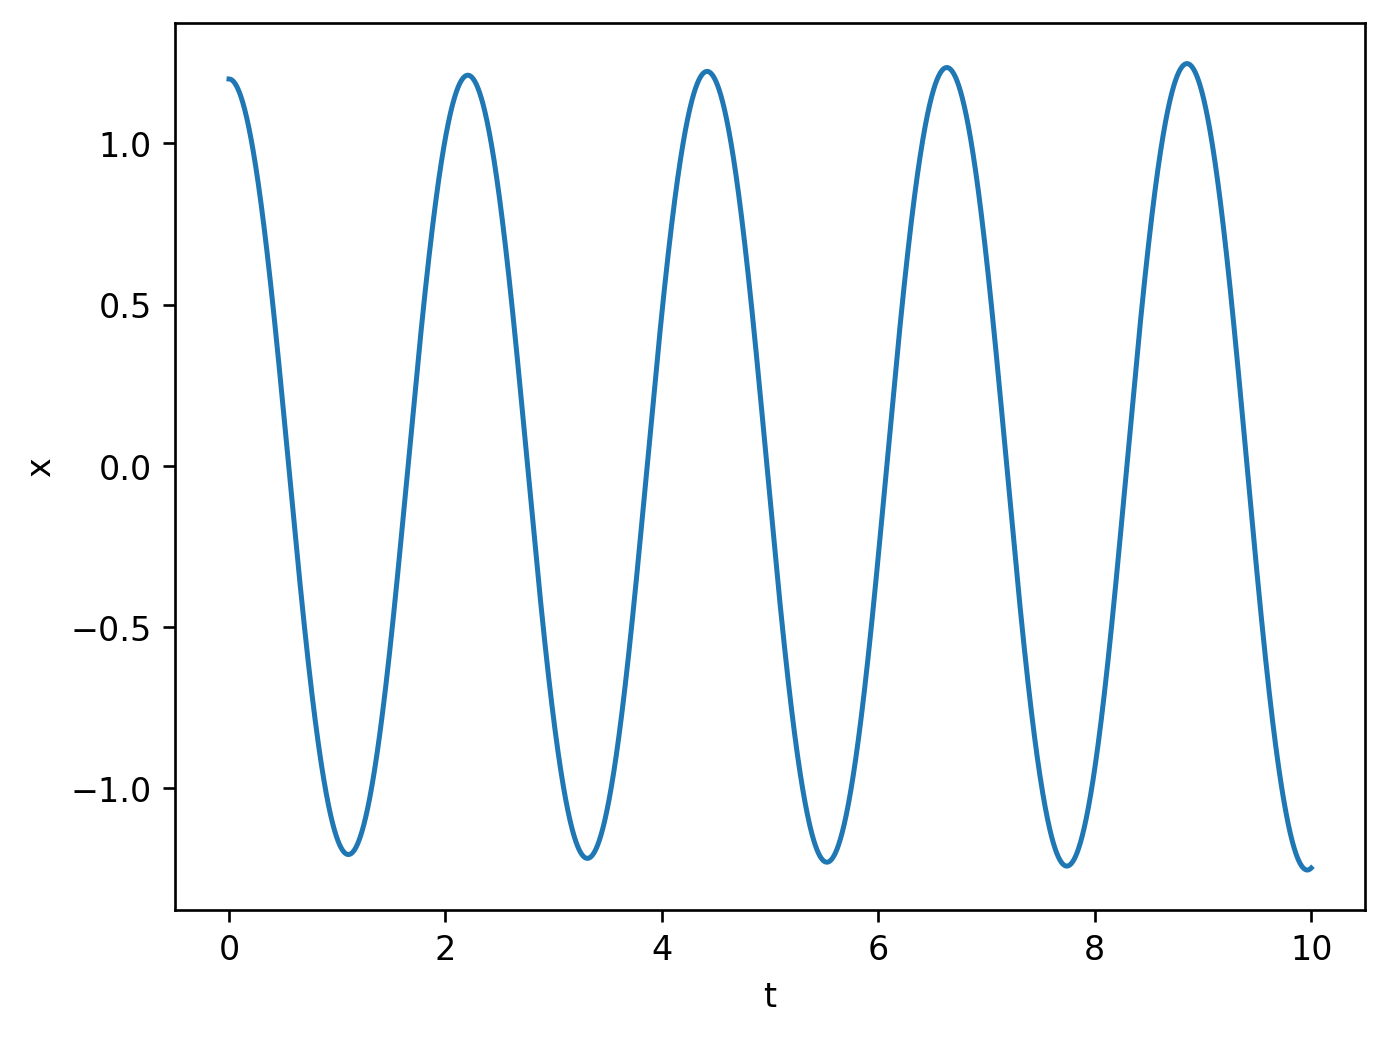

In [11]:
T,X,Y=ex3_eulerexp(1.2,10,10000)
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')

4) Pour construire cette fonction, on calcule la solution et on parcourt la liste des Y[i] pour trouver tous les pics.
Selon la convention, on peut choisir (ou non) d'inclure le temps $t=0$ dans les pics: on fait ici le choix de l'inclure.

In [12]:
def ex3_liste_de_max(x0,Tf,N):
    T,X,Y=ex3_eulerexp(x0,Tf,N)
    L=[0]#liste des changements de signe.
    for i in range(N-1):
        if Y[i]>0 and Y[i+1]<=0:
            L.append(T[i])
    return L

5) On va prendre $x^{init}=\pi/2,\pi/3,\pi/4,\pi/5$.

On commence par $x_0=\pi/2$. Pour approcher la période, on peut prendre la différence de temps entre deux pics. Comme c'est une solution approchée, ici la différences entre deux pic succesifs n'est pas tout à fait constante: on donne à la place la moyenne des écarts entre deux pics successifs.

In [13]:
def ex3_certif_periode(x0,Tf,N):
    L=ex3_liste_de_max(x0,Tf,N)
    if len(L)==1:
        print("Pas de pics observés")
    else:
        ecarts=[L[i+1]-L[i] for i in range(len(L)-1)]
        moy=sum(ecarts)/len(ecarts)
        print('liste des pics pour x=pi/2: ',L)
        print('écarts successifs:', ecarts)
        print('moyenne des écarts successifs:', moy)
        certif=True
        for i in range(len(ecarts)):
            if np.abs(ecarts[i]-moy)>0.01*moy:#on teste si l'écart est loin de sa moyenne
                certif=False
                print('Nombre de pas insuffisant pour calculer la moyenne.')
                break#on peut sortir de la boucle for
        if certif:
            print("L'écart successif entre les pics ne varie pas de plus de 1%")

ex3_certif_periode(np.pi/2,10,1000)

liste des pics pour x=pi/2:  [0, 2.41, 4.94, 7.63]
écarts successifs: [2.41, 2.5300000000000002, 2.6899999999999995]
moyenne des écarts successifs: 2.5433333333333334
Nombre de pas insuffisant pour calculer la moyenne.


$N=1000$ est visiblement trop faible. On prend $N$ plus grand:

In [14]:
ex3_certif_periode(np.pi/2,10,200000)

liste des pics pour x=pi/2:  [0, 2.36925, 4.7389, 7.109, 9.47955]
écarts successifs: [2.36925, 2.36965, 2.3701, 2.3705499999999997]
moyenne des écarts successifs: 2.3698875
L'écart successif entre les pics ne varie pas de plus de 1%


On trouve donc $T\approx 2.369$. 


On fait ensuite le calcul pour les valeurs $\pi/3,\pi/4,\pi/5$.

In [15]:
for i in range(3,6):
    print('Calcul pour x=pi/',i,':')
    ex3_certif_periode(np.pi/i,10,200000)

Calcul pour x=pi/ 3 :
liste des pics pour x=pi/2:  [0, 2.154, 4.30825, 6.4626, 8.6171]
écarts successifs: [2.154, 2.15425, 2.15435, 2.1545000000000005]
moyenne des écarts successifs: 2.154275
L'écart successif entre les pics ne varie pas de plus de 1%
Calcul pour x=pi/ 4 :
liste des pics pour x=pi/2:  [0, 2.0873500000000003, 4.1748, 6.262300000000001, 8.3499]
écarts successifs: [2.0873500000000003, 2.08745, 2.0875000000000004, 2.0875999999999992]
moyenne des écarts successifs: 2.087475
L'écart successif entre les pics ne varie pas de plus de 1%
Calcul pour x=pi/ 5 :
liste des pics pour x=pi/2:  [0, 2.05775, 4.115600000000001, 6.173500000000001, 8.23145]
écarts successifs: [2.05775, 2.0578500000000006, 2.0579, 2.05795]
moyenne des écarts successifs: 2.0578625
L'écart successif entre les pics ne varie pas de plus de 1%


On remarque que la période semble être une fonction croissante de la condition initiale ; lorsqu'on diminue $x$, la période diminue aussi.

6) On a vérifié pour différentes valeurs de $x_0$ entre $0$ et $\pi/2$ qu'avec un temps final supérieur à 3, et pour un nombre de pas assez grand, la période est toujours inférieure à $3$. On se repose sur cette observation empirique pour écrire la fonction ci-dessous.

In [16]:
def ex3_calcul_periode(x0,N):
    L=ex3_liste_de_max(x0,3,N)
    return L[1]

7) On fixe $N$ assez grand, on subdivise l'intervalle $[0,\pi/2]$ en 20 intervalles régulier et on applique la fonction précédente sur chacun d'entre eux.

Text(0, 0.5, 'période')

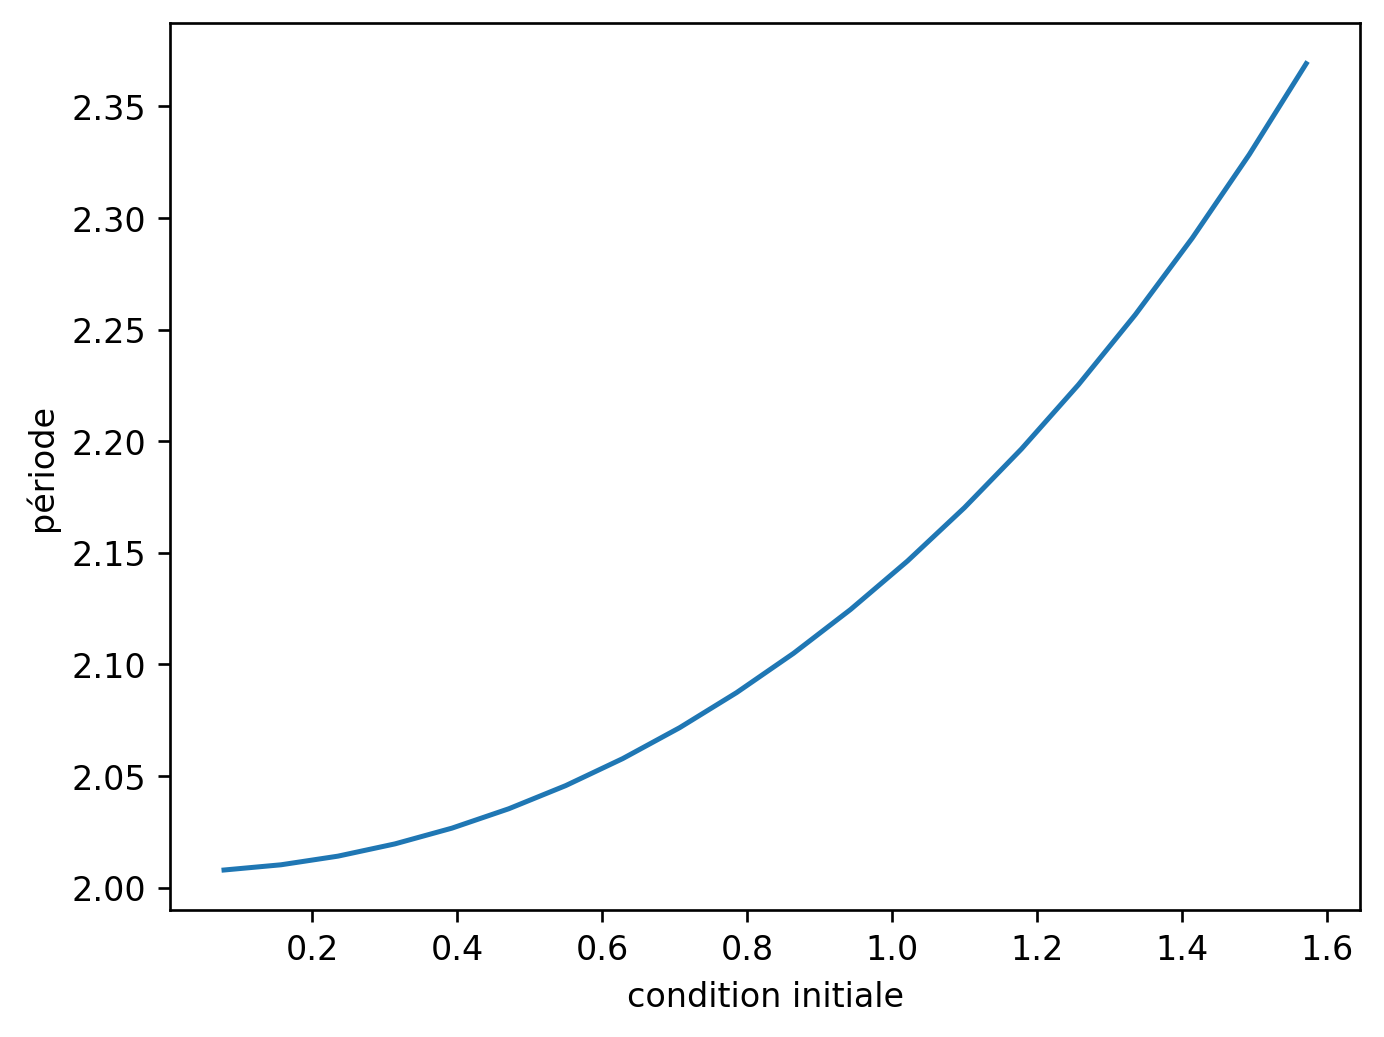

In [17]:
K=20#nombre d'intervalles dans la subdivision
X=np.linspace(0,np.pi/2,K+1)#construction de la subdivision
X=X[1:]#On élimine la condition initiale nulle: celle-ci n'est pas associée à une période
P=np.zeros(K)
for i in range(K):
    P[i]=ex3_calcul_periode(X[i],100000)
plt.plot(X,P)
plt.xlabel('condition initiale')
plt.ylabel('période')

On va maintenant comparer la courbe obtenue à la formule suggérée.

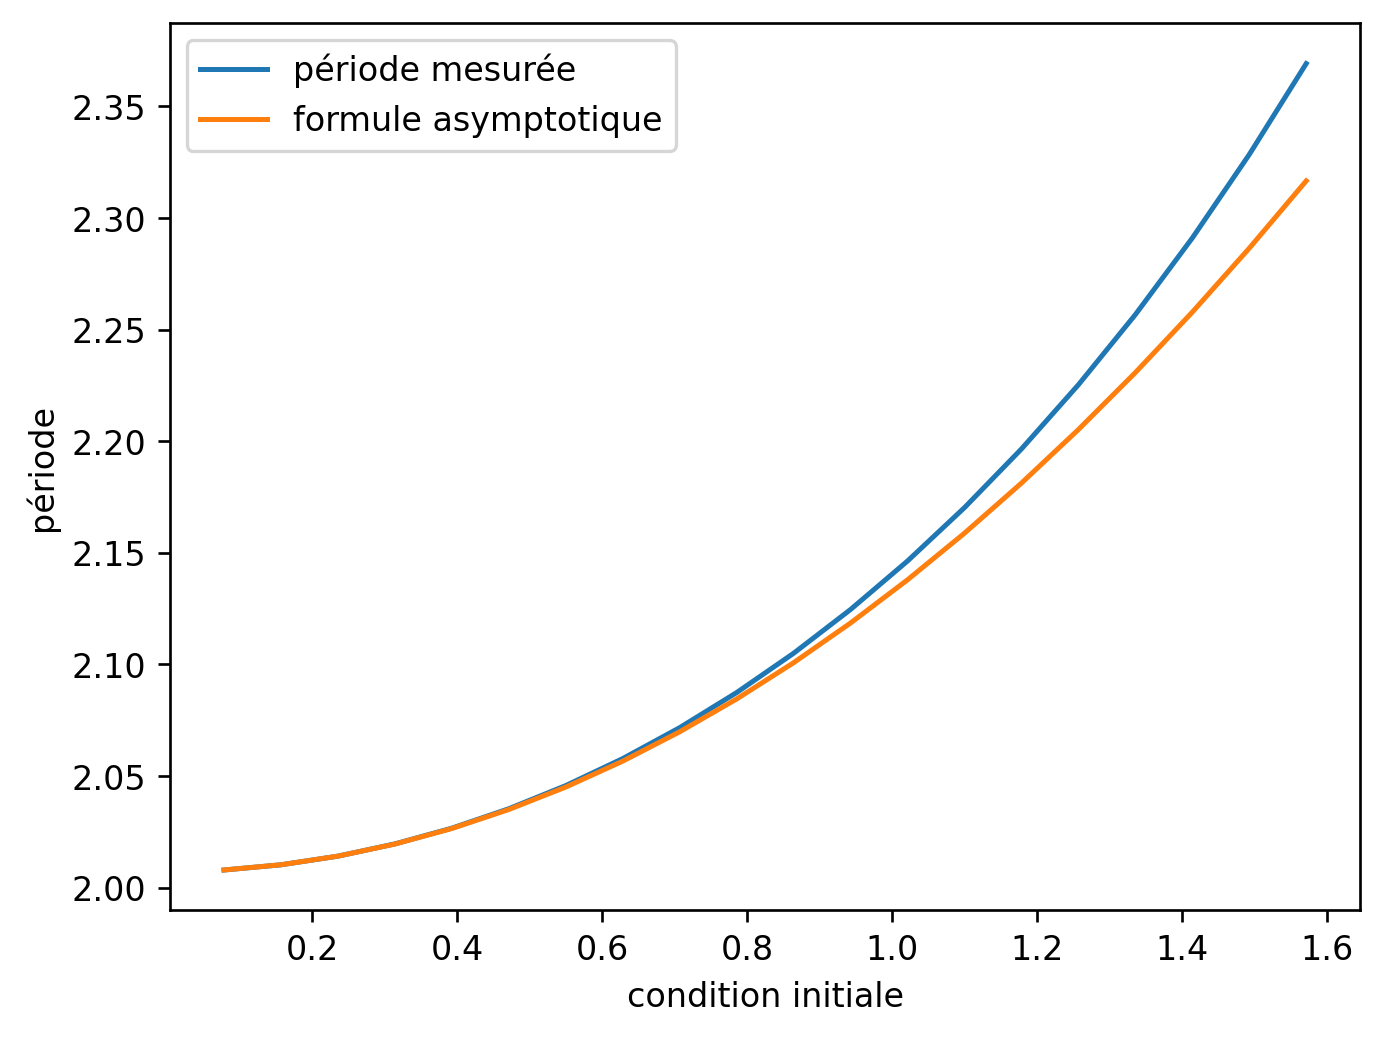

In [18]:
plt.plot(X,P,label='période mesurée')
plt.plot(X,2*np.pi*np.sqrt(1/9.8)*(1+ X**2 / 16),label='formule asymptotique')
plt.xlabel('condition initiale')
plt.ylabel('période')
plt.legend(loc='upper left')

Comme ces deux courbes (disons $f(x)$ et $g(x)$) semble collées (elles semblent avoir la même tangente et la même dérivée seconde), on peut représenter $(f(x)-g(x))/x^2$: si c'est bien une approximation jusqu'à la dérivée seconde, alors cette quantité devrait tendre vers $0$ lorsque $x\to 0$.

Text(0, 0.5, '(période-asymptotique)/x^2')

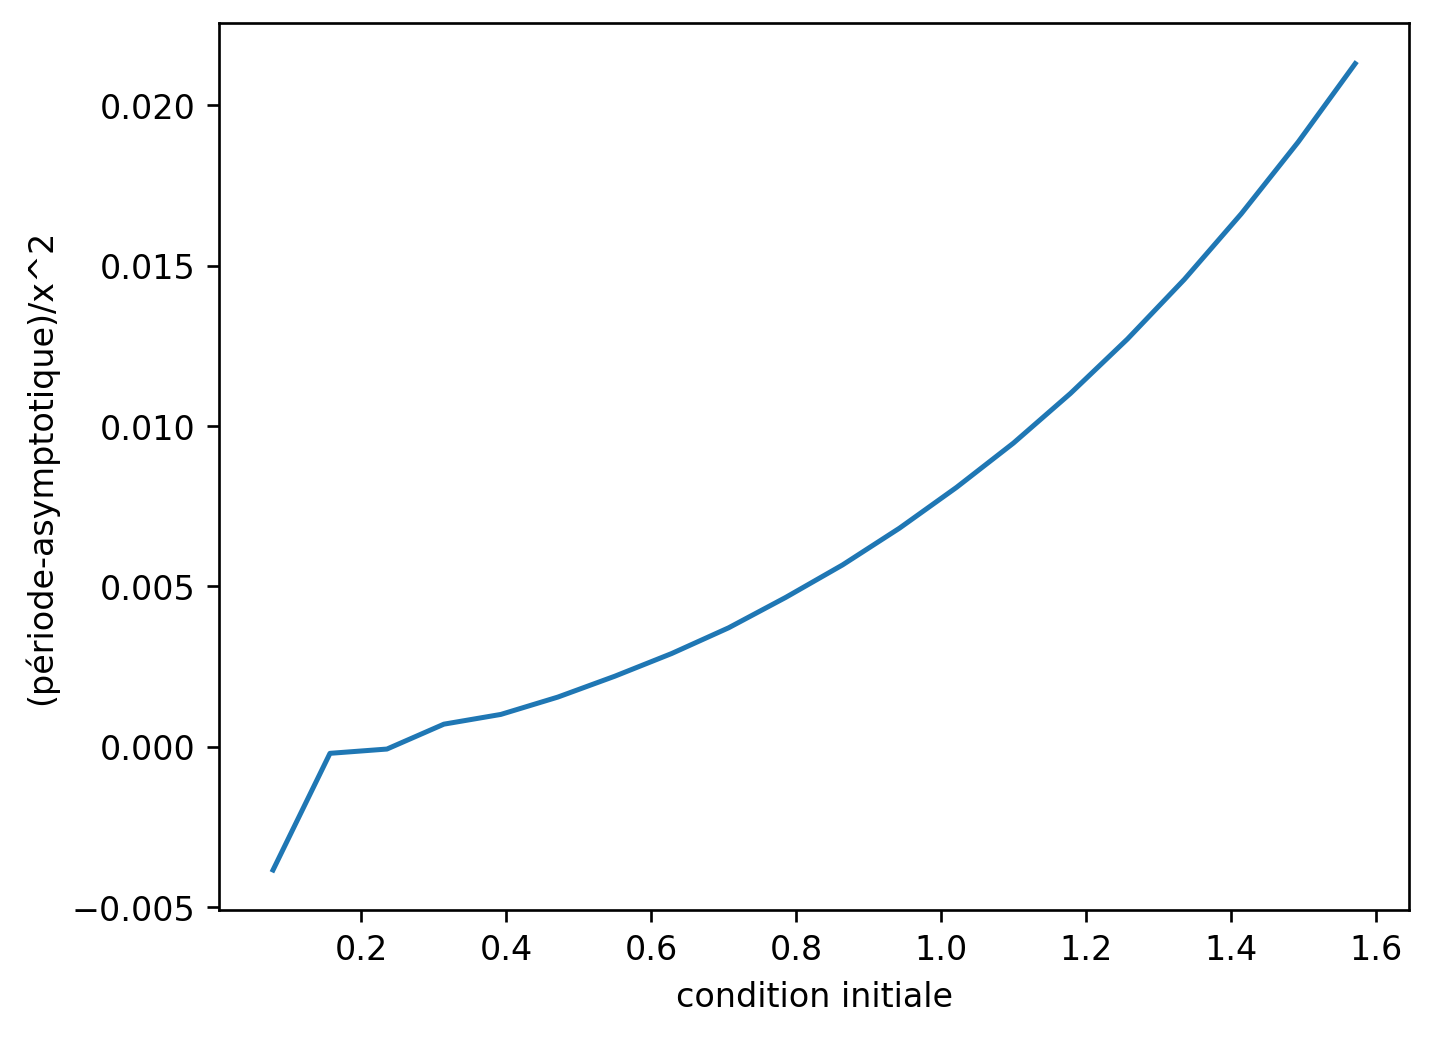

In [19]:
plt.plot(X,(P-2*np.pi*np.sqrt(1/9.8)*(1+ X**2 / 16))/X**2,label='formule asymptotique')
plt.xlabel('condition initiale')
plt.ylabel('(période-asymptotique)/x^2')

Au vu des valeurs prises, c'est donc une bonne approximation. Néamoins on commence à voir des défauts de simulation pour $x$ proche de $0$:  pour éliminer cela on aurait besoin de simuler les solutions avec une meilleurs précision.

8) Comme on ne sait pas, a priori, quelle est la période associé à une condition initiale $x^{init}$, on va prendre un temps final grand. Pour réduire le nombre de calcul inutile, on va cette fois arreter la recherche de pic dès qu'on a trouvé un premier pic.

Comme $0$, et $\pi$ sont des points d'équilibres de l'équation (la solution associée reste constante), on les exclut à la main de l'intervalle de condition initiale pour lesquels on recherche la période.

Text(0, 0.5, 'période')

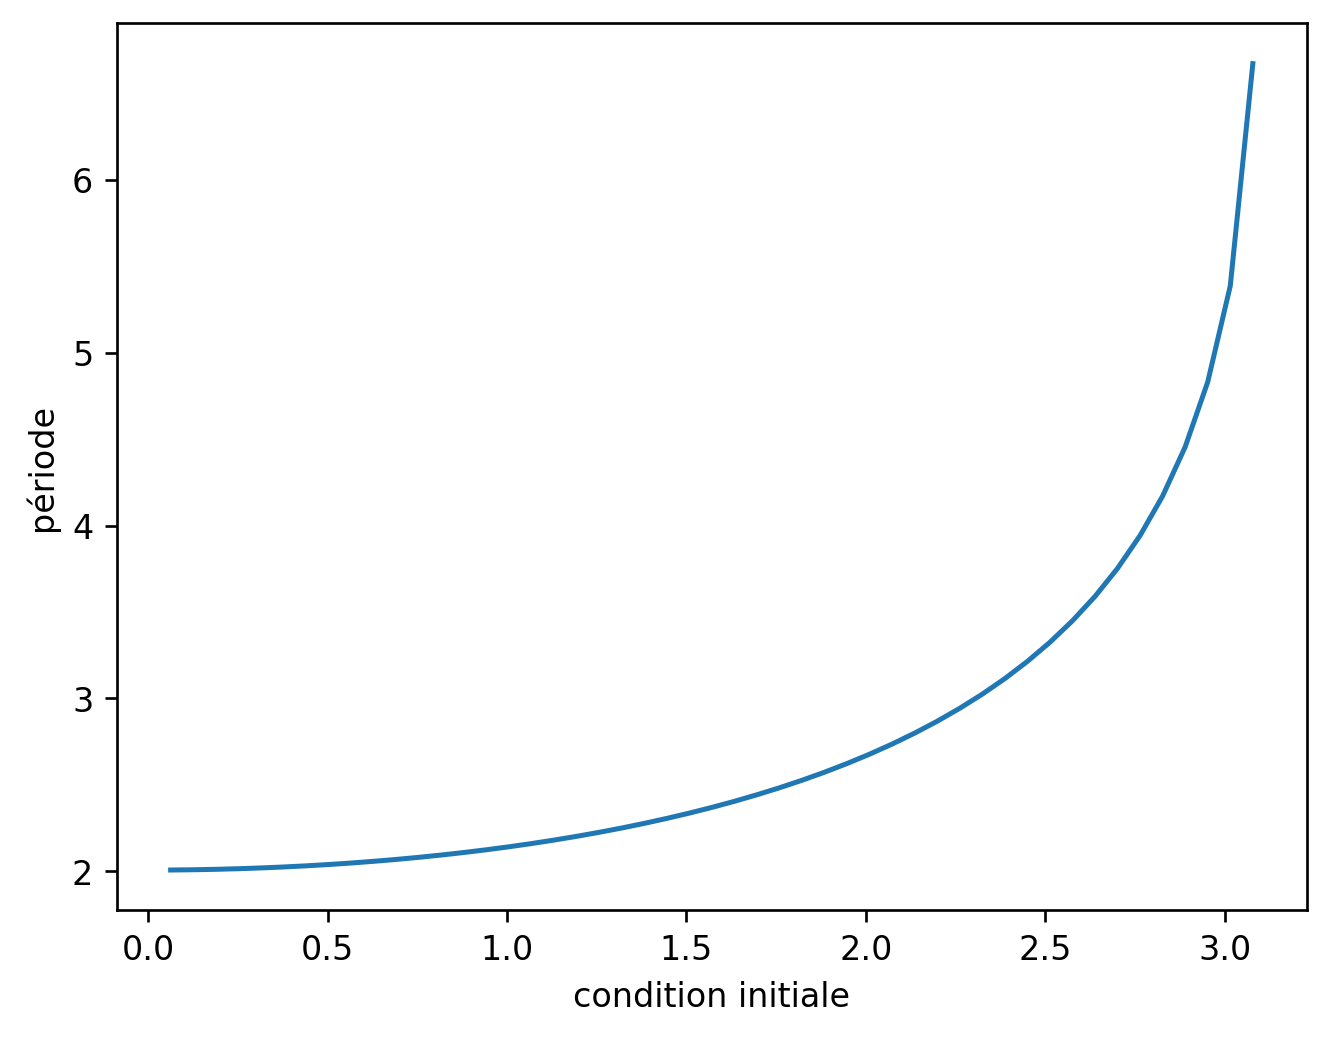

In [20]:
def ex3_premier_pic(x0,Tf,N):
    T=np.linspace(0,Tf,N+1)
    dt=Tf/N
    X=np.zeros(N+1)
    Y=np.zeros(N+1)
    X[0]=x0
    p=0#valeur de la période, initiée à 0 par défaut
    for i in range(N):
        X[i+1]=X[i]+dt*Y[i]
        Y[i+1]=Y[i]+dt*(-9.8*np.sin(X[i]))
        if Y[i]>0 and Y[i+1]<=0:
            p=T[i]
            break#permet de sortir de la boucle for: on arrète les calculs
    if p==0:
        print('pas de période trouvée pour Tf=',Tf,', xinit=',x0)
        return Tf#on renvoie le temps final, qui est inférieur à la période
    else:
        return p

K=50#nombre d'intervalles dans la subdivision
Tf=20#temps final maximal dans le calcul des périodes
N=100000#nombre d'étapes dans la méthode d'euler
X=np.linspace(0,np.pi,K+1)#construction de la subdivision
X=X[1:K]#On élimine la condition initiale nulle: celle-ci n'est pas associée à une période. On élimine aussi la condition initiale pi pour la même raison
P=np.zeros(K-1)
for i in range(K-1):
    P[i]=ex3_premier_pic(X[i],Tf,200000)
plt.plot(X,P)
plt.xlabel('condition initiale')
plt.ylabel('période')

La période semble diverger quand la condition initiale tend vers $\pi$: c'est cohérent avec l'intuition que si le pendule démarre très proche de la verticale (pointant vers le haut), il va mettre un certain temps à s'en écarter.

# Exercice 4

1) La fonction $x\mapsto x(1-x)$ est positive dans $]0,1[$, nulle en $0$, $1$, et négative ailleurs. Cela signifie que pour toute condition initiale $x_0\geq 0$, on a soit
- $x_0=0$ et alors la population reste nulle.
- $0<x_0<1$ et alors la population augmente et tend vers $1$.
- $x_0=1$ et alors la population reste égale à $1$.
- $x_0>1$ et alors la population diminue et tend vers $1$.

2)

In [21]:
def ex4_eulerexp(h,x0,Tf,N):#on introduit le paramètre h qui sera utile dans les questions suivantes
    T=np.linspace(0,Tf,N+1)
    dt=Tf/N
    X=np.zeros(N+1)
    X[0]=x0
    for i in range(N):
        X[i+1]=X[i]+dt*(X[i]*(1-X[i])-h*X[i]/(0.2+X[i]))
    return T,X

3)

Text(0, 0.5, 'x')

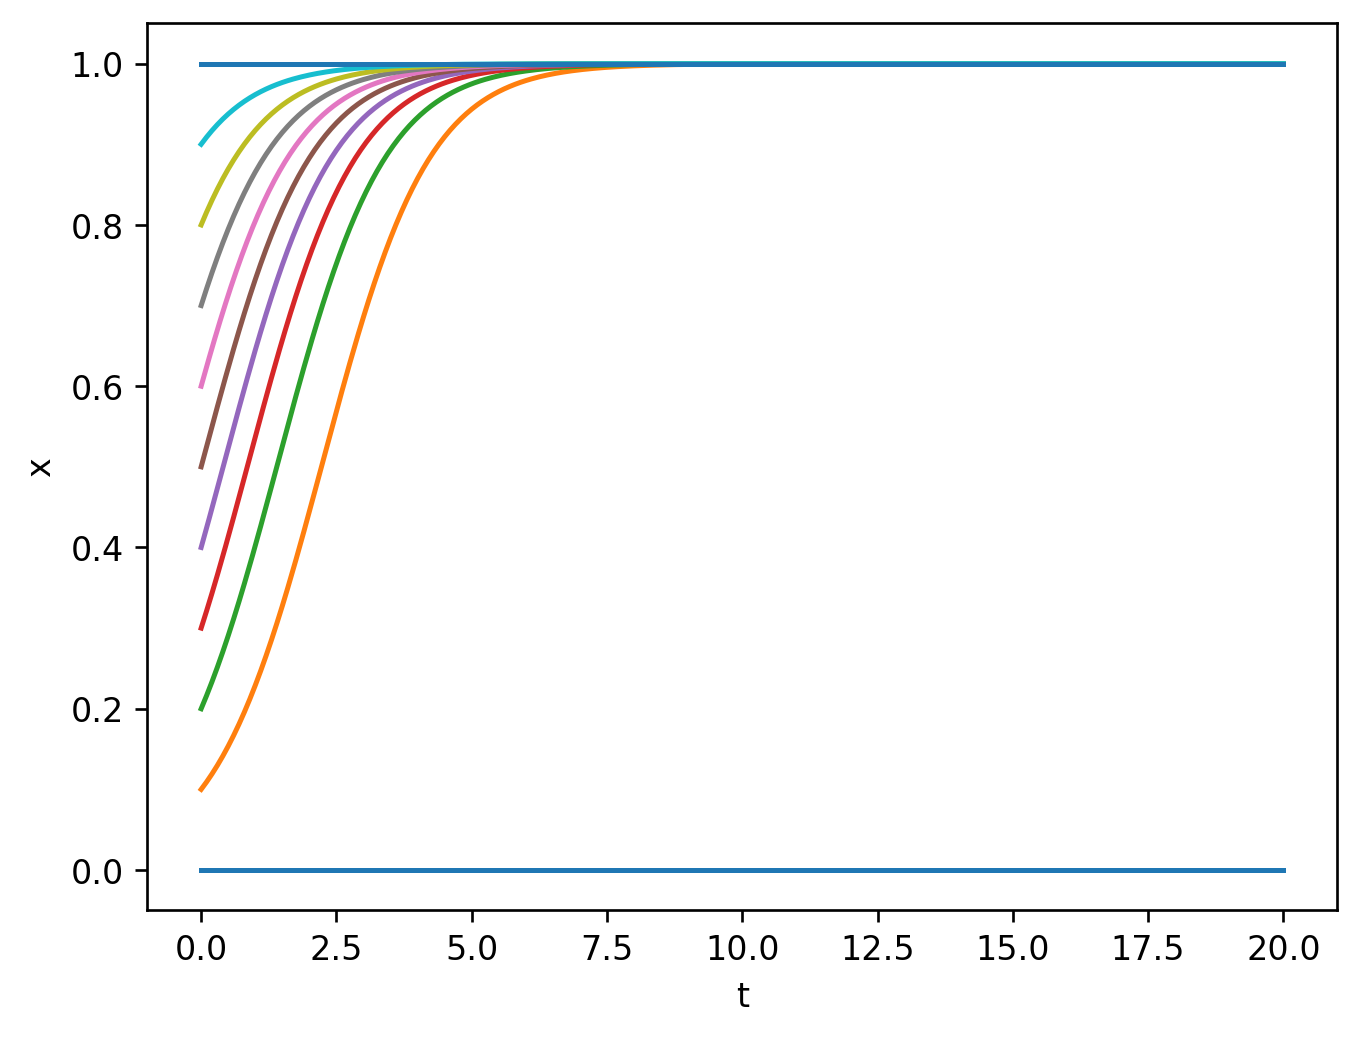

In [22]:
for k in range(11):#k parcourt 0,1,2,3,..,10
    T,X=ex4_eulerexp(0,k/10,20,400)#ici h=0: pas de pêche
    plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')

4) La quantité $\frac{h x}{x+0.2}$ tend vers $h$ lorsque $x\to+\infty$, c'est-à-dire lorsque les poissons sont présents en abondance. La quantité $h$ représente alors la capacité totale de pêche lorsque les poissons sont en abondance: entre les temps $t$ et $t+\Delta t$, il y aura environ $h\Delta t$ poissons pêchés, ce qui (contrairement au taux de croissance) est indépendant du nombre total de poissons.

Lorsque la population de poisson devient de plus en plus faible, le facteur limitant n'est plus la capacité de pêche mais la faible population et le prélevement diminue, jusqu'à valoir $\frac{h\times 0}{0+0.2}=0$ lorsque la population de poissons $x$ vaut $0$.

5)

valeur x(20) pour la condition x0= 0 /10:  0.0
valeur x(20) pour la condition x0= 1 /10:  0.8582534258198801
valeur x(20) pour la condition x0= 2 /10:  0.8582564101525308
valeur x(20) pour la condition x0= 3 /10:  0.8582570190188784
valeur x(20) pour la condition x0= 4 /10:  0.8582572615028411
valeur x(20) pour la condition x0= 5 /10:  0.8582573882935951
valeur x(20) pour la condition x0= 6 /10:  0.8582574652102354
valeur x(20) pour la condition x0= 7 /10:  0.858257516442889
valeur x(20) pour la condition x0= 8 /10:  0.858257552827433
valeur x(20) pour la condition x0= 9 /10:  0.8582575799007377
valeur x(20) pour la condition x0= 10 /10:  0.8582576007717071


Text(0, 0.5, 'x')

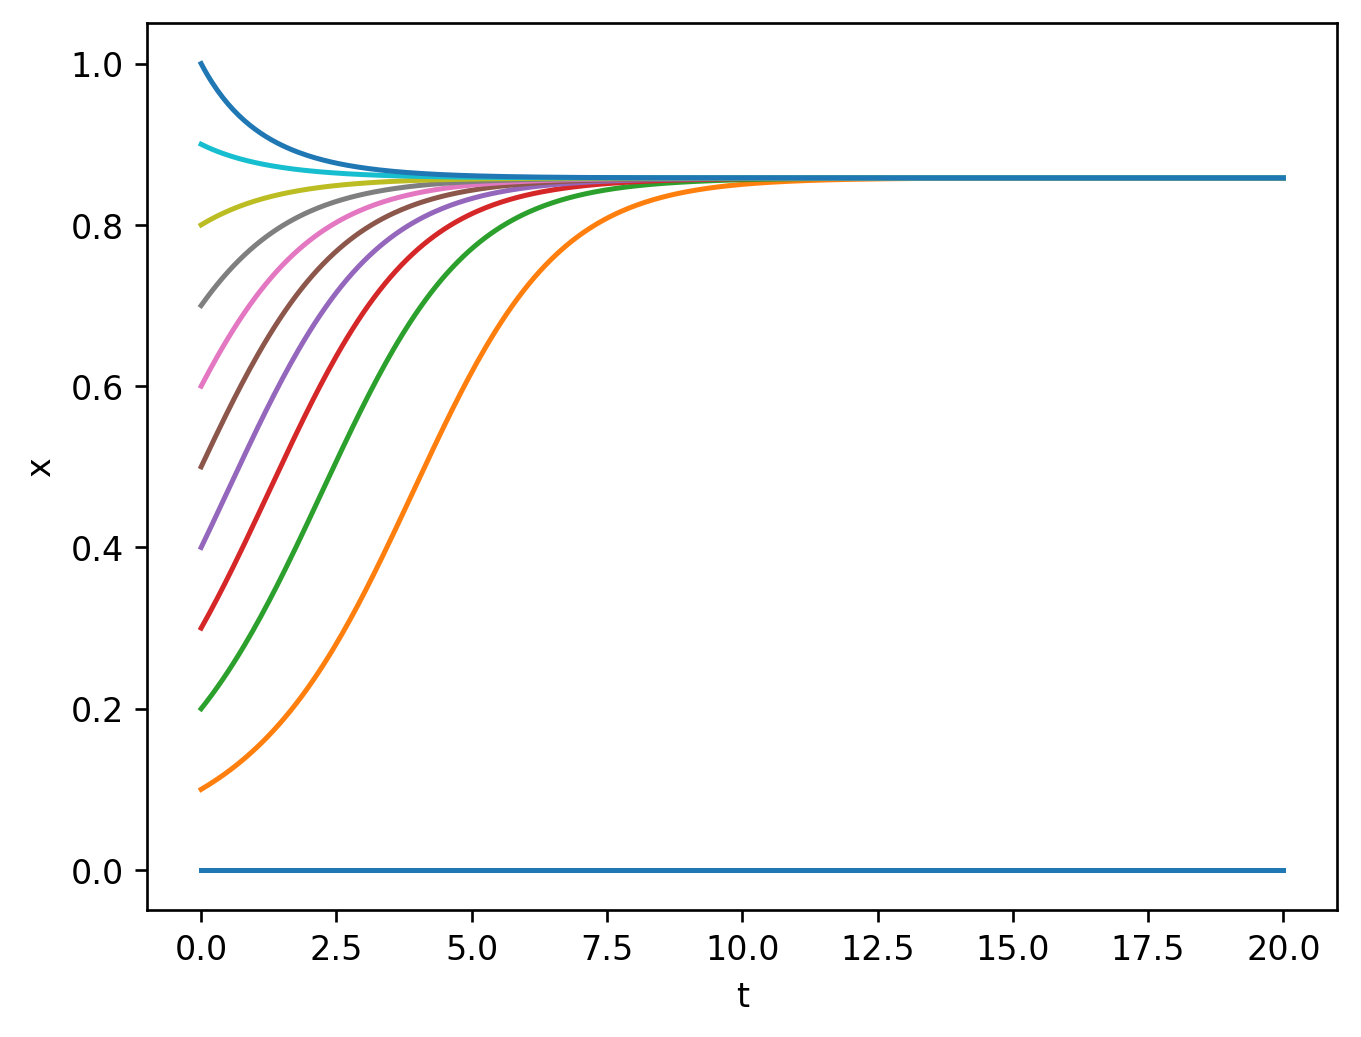

In [23]:
for k in range(11):#k parcourt 0,1,2,3,..,10
    T,X=ex4_eulerexp(0.15,k/10,20,400)
    plt.plot(T,X)
    print('valeur x(20) pour la condition x0=',k,'/10: ',X[400])
plt.xlabel('t')
plt.ylabel('x')

On constate que les solutions ont essentiellement le même comportement que précédemment (toute population initiale strictement positive tend vers la même limite), mais que la population limite a diminué de $1$ à environ $0.85$.

6) On fait d'abord le cas $h=0.33$:

valeur x(20) pour la condition x0= 0 /10:  0.0
valeur x(20) pour la condition x0= 1 /10:  9.146250366277116e-07
valeur x(20) pour la condition x0= 2 /10:  0.00027152906734044996
valeur x(20) pour la condition x0= 3 /10:  0.5628072765904846
valeur x(20) pour la condition x0= 4 /10:  0.5709507903391532
valeur x(20) pour la condition x0= 5 /10:  0.5726547244902432
valeur x(20) pour la condition x0= 6 /10:  0.5733448568142637
valeur x(20) pour la condition x0= 7 /10:  0.5737086861226431
valeur x(20) pour la condition x0= 8 /10:  0.5739303013328099
valeur x(20) pour la condition x0= 9 /10:  0.5740782182776892
valeur x(20) pour la condition x0= 10 /10:  0.5741833736081601


Text(0, 0.5, 'x')

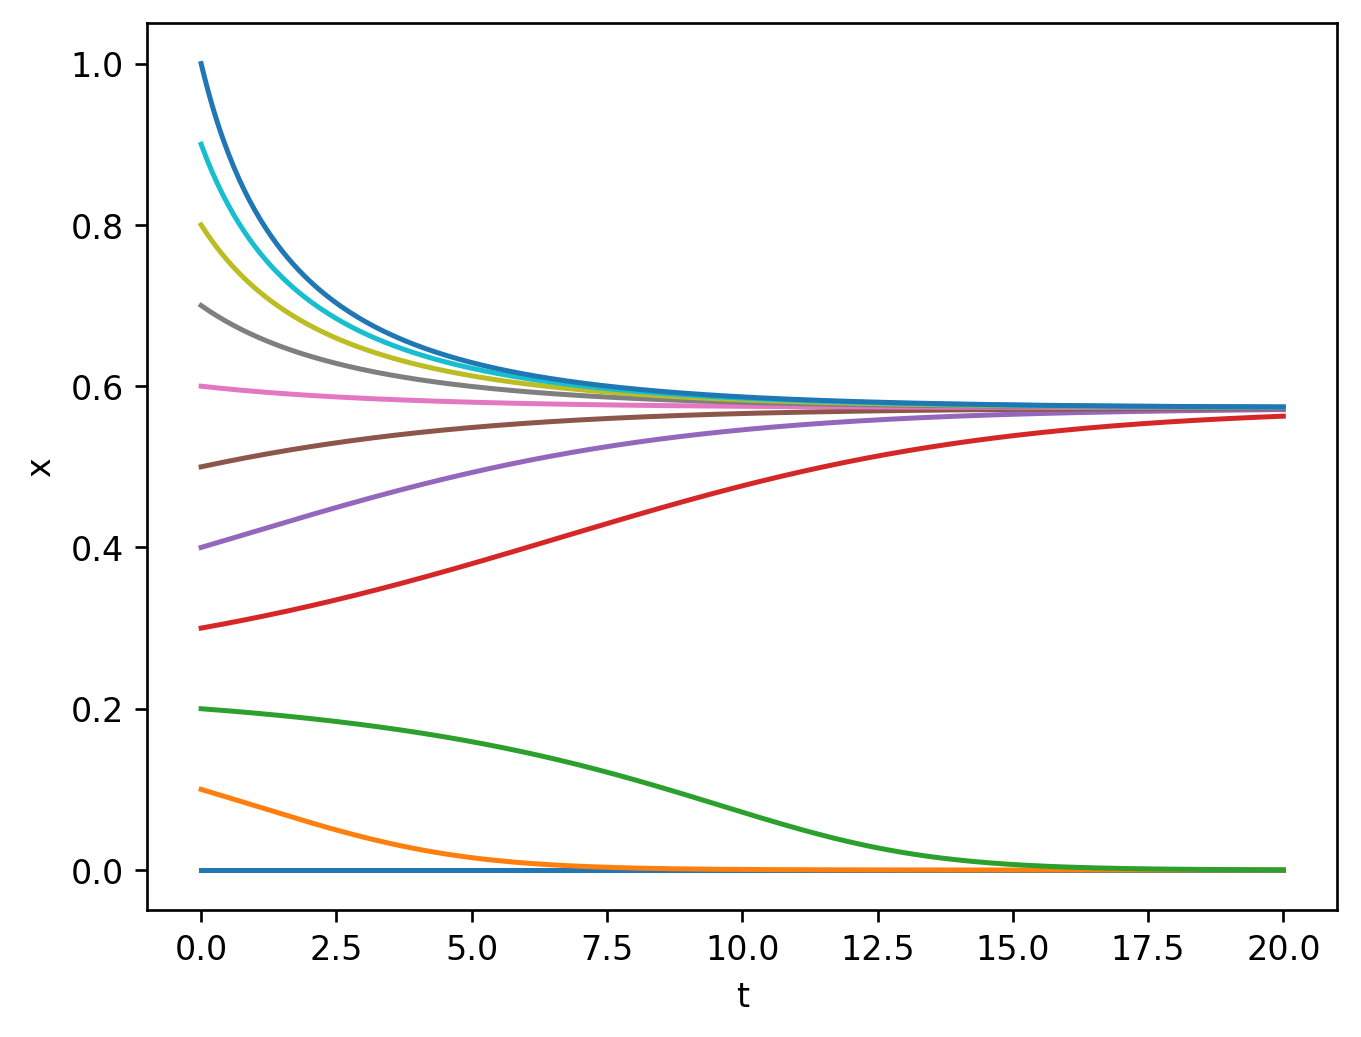

In [24]:
for k in range(11):#k parcourt 0,1,2,3,..,10
    T,X=ex4_eulerexp(0.33,k/10,20,400)
    plt.plot(T,X)
    print('valeur x(20) pour la condition x0=',k,'/10: ',X[400])
plt.xlabel('t')
plt.ylabel('x')

Cette fois il y a plus de comportement possibles: les solutions associées à une condition initiale $0.1,0.2$ convergent vers $0$, ce qui signifie que le taux de pêche mène la population à l'extinction, tandis que les solutions associées aux conditions initiales $0.3$ ou plus tendent vers une limite commune strictement positive, environ égale à $0.57$.

Faisons maintenant le cas $h=0.4$:

valeur x(20) pour la condition x0= 0 /10:  0.0
valeur x(20) pour la condition x0= 1 /10:  3.8263934323156557e-10
valeur x(20) pour la condition x0= 2 /10:  4.13318091747532e-09
valeur x(20) pour la condition x0= 3 /10:  8.096021511681825e-08
valeur x(20) pour la condition x0= 4 /10:  3.4151833813551856e-06
valeur x(20) pour la condition x0= 5 /10:  0.0001060243984071977
valeur x(20) pour la condition x0= 6 /10:  0.000990661814718662
valeur x(20) pour la condition x0= 7 /10:  0.0035927764232497137
valeur x(20) pour la condition x0= 8 /10:  0.007665785892004268
valeur x(20) pour la condition x0= 9 /10:  0.012287427457926546
valeur x(20) pour la condition x0= 10 /10:  0.0167791472293691


Text(0, 0.5, 'x')

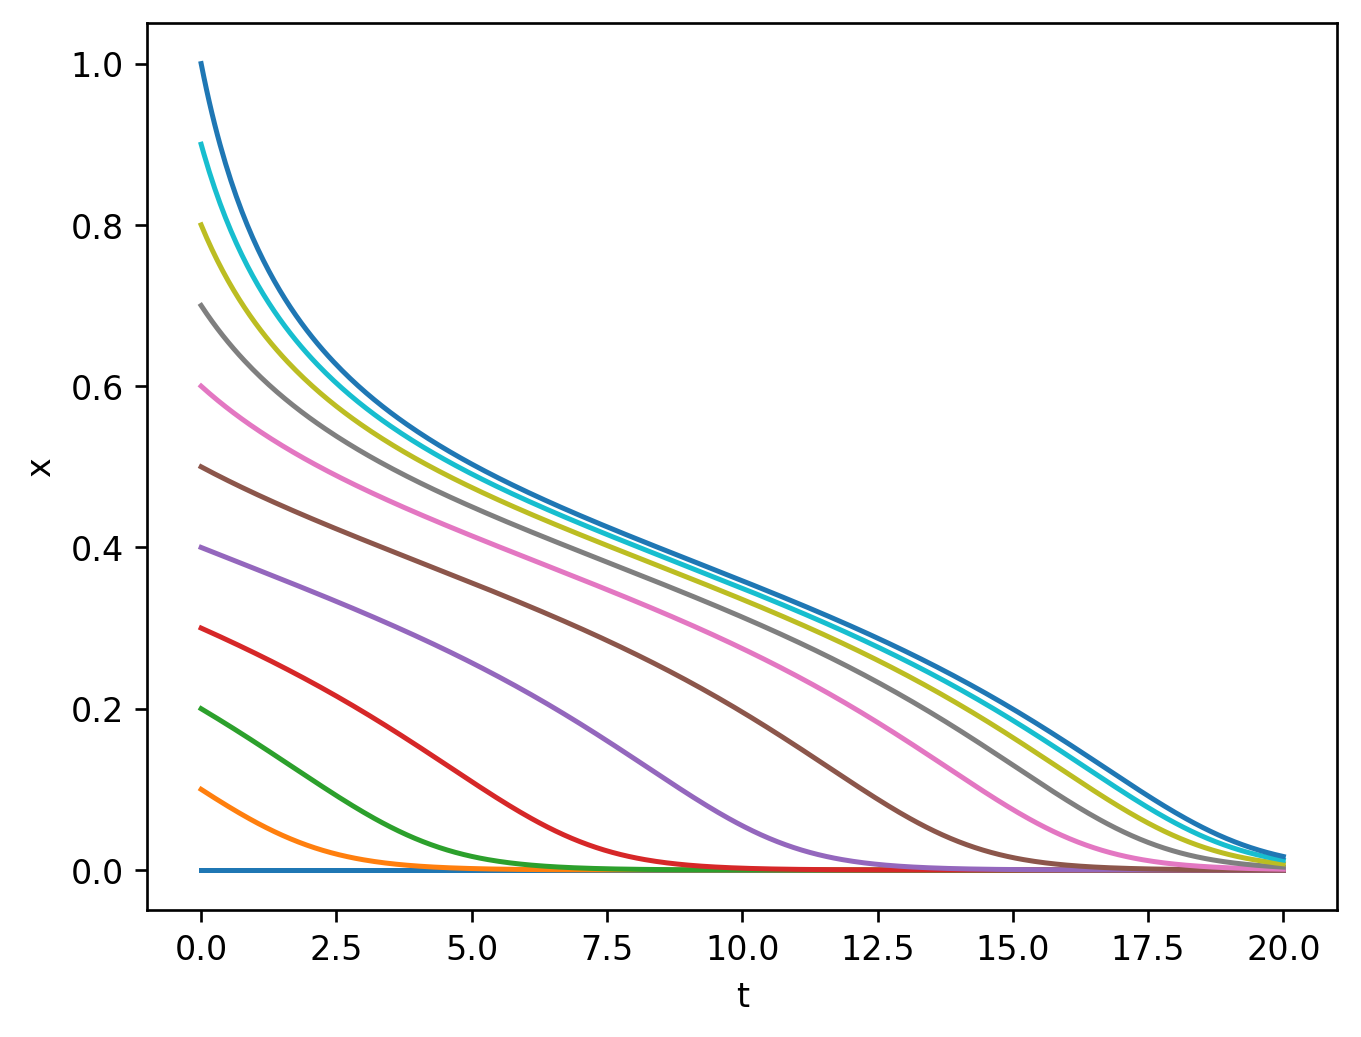

In [25]:
for k in range(11):#k parcourt 0,1,2,3,..,10
    T,X=ex4_eulerexp(0.4,k/10,20,400)
    plt.plot(T,X)
    print('valeur x(20) pour la condition x0=',k,'/10: ',X[400])
plt.xlabel('t')
plt.ylabel('x')

Dans ce cas, la population de poissons est menée à l'extinction peu importe la population initiale: le phénomène de seuil observé précédemment a disparu.